## Using modularity

In [1]:
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt

In [2]:
def modularity(G, communities):
    Q=0
    for c in communities:
        mysubgraph=G.subgraph(c)
        sumDegree=0
        for i in c:
            sumDegree+=G.degree(i)
        Q+=mysubgraph.number_of_edges()/G.number_of_edges()-(sumDegree/(2*G.number_of_edges()))**2
    return Q

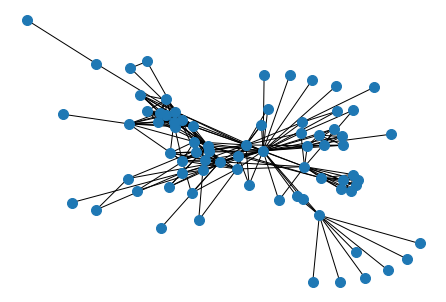

In [22]:
#G=nx.relaxed_caveman_graph(3,10, 0.1)
#G=nx.karate_club_graph()
G=nx.les_miserables_graph()
# G=nx.complete_graph(15)
# G.add_edge(14,15)
# G.add_edge(15,16)
# G.add_edge(16,17)
#G=nx.barabasi_albert_graph(30,1)
#G=nx.erdos_renyi_graph(30, 0.3)
pos=nx.spring_layout(G)
nx.draw(G, pos, node_size=100)

In [23]:
# Every node is its own community initially.
communities=[]
for i in G.nodes():
    communities.append([i])
print(communities)

[['Napoleon'], ['Myriel'], ['MlleBaptistine'], ['MmeMagloire'], ['CountessDeLo'], ['Geborand'], ['Champtercier'], ['Cravatte'], ['Count'], ['OldMan'], ['Valjean'], ['Labarre'], ['Marguerite'], ['MmeDeR'], ['Isabeau'], ['Gervais'], ['Listolier'], ['Tholomyes'], ['Fameuil'], ['Blacheville'], ['Favourite'], ['Dahlia'], ['Zephine'], ['Fantine'], ['MmeThenardier'], ['Thenardier'], ['Cosette'], ['Javert'], ['Fauchelevent'], ['Bamatabois'], ['Perpetue'], ['Simplice'], ['Scaufflaire'], ['Woman1'], ['Judge'], ['Champmathieu'], ['Brevet'], ['Chenildieu'], ['Cochepaille'], ['Pontmercy'], ['Boulatruelle'], ['Eponine'], ['Anzelma'], ['Woman2'], ['MotherInnocent'], ['Gribier'], ['MmeBurgon'], ['Jondrette'], ['Gavroche'], ['Gillenormand'], ['Magnon'], ['MlleGillenormand'], ['MmePontmercy'], ['MlleVaubois'], ['LtGillenormand'], ['Marius'], ['BaronessT'], ['Mabeuf'], ['Enjolras'], ['Combeferre'], ['Prouvaire'], ['Feuilly'], ['Courfeyrac'], ['Bahorel'], ['Bossuet'], ['Joly'], ['Grantaire'], ['MotherPlut

In [24]:
iteration=0
print(modularity(G,communities))

-0.02373054746109493


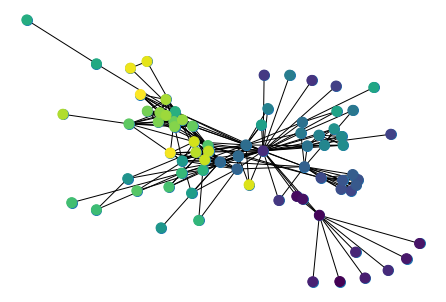

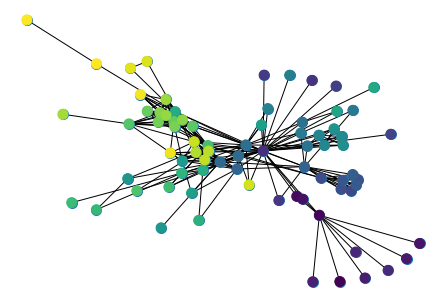

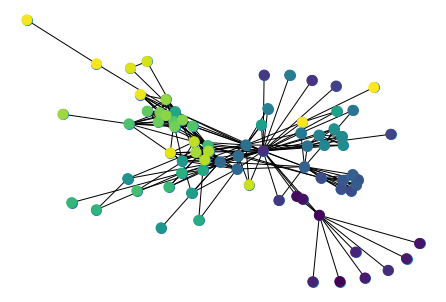

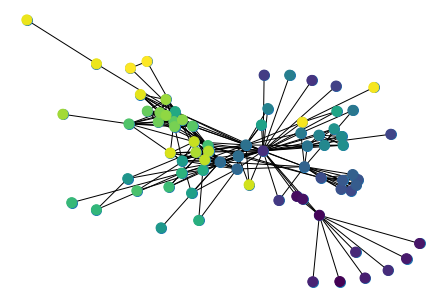

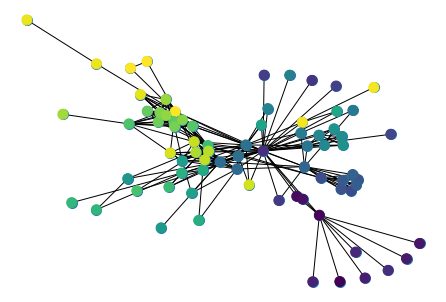

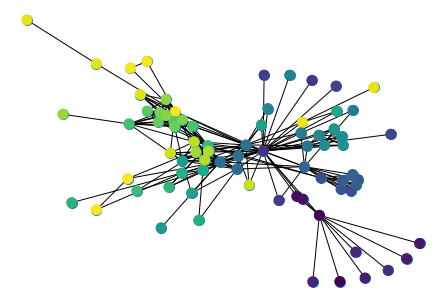

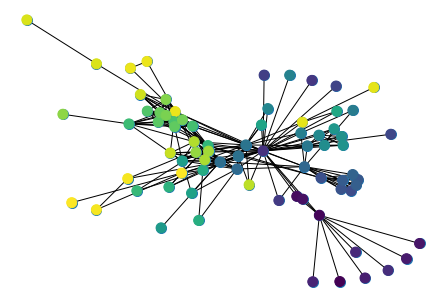

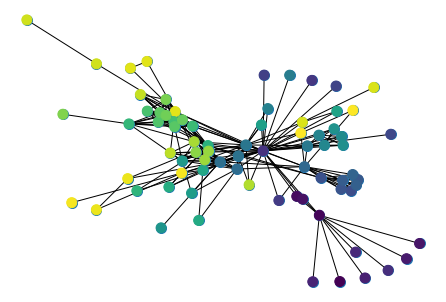

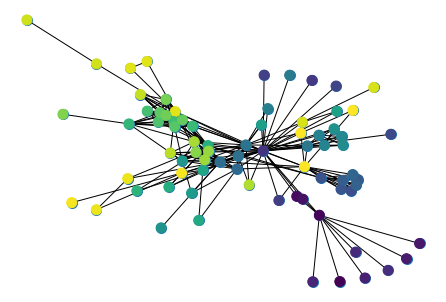

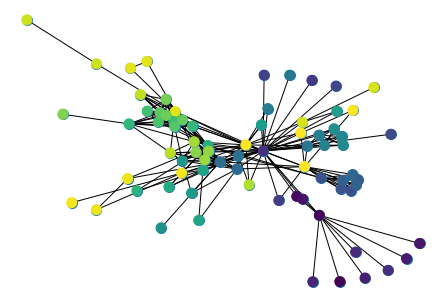

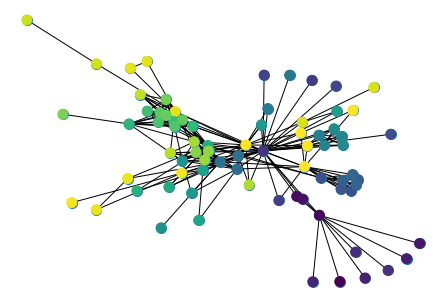

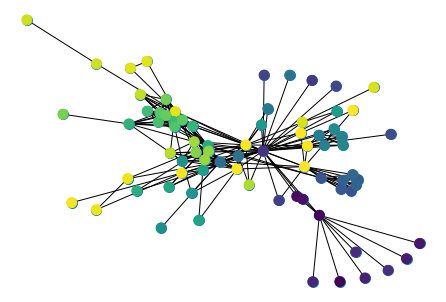

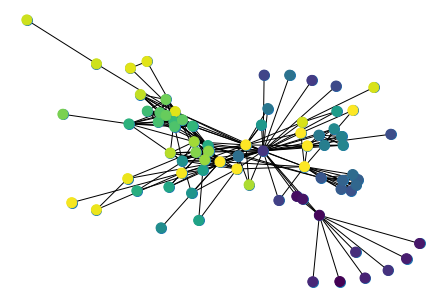

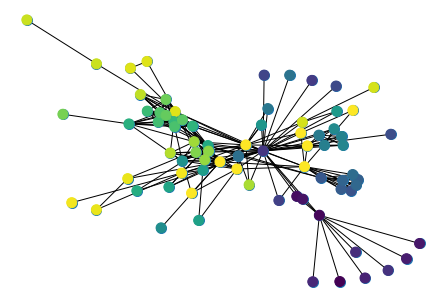

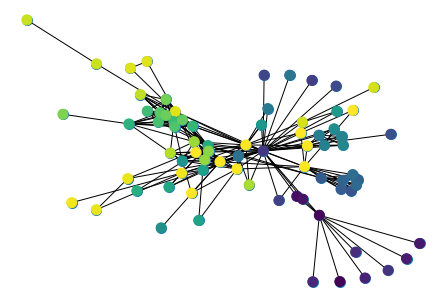

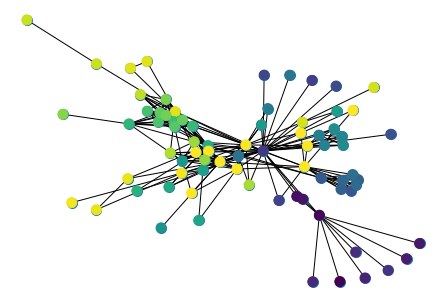

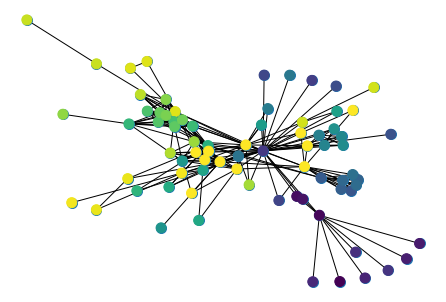

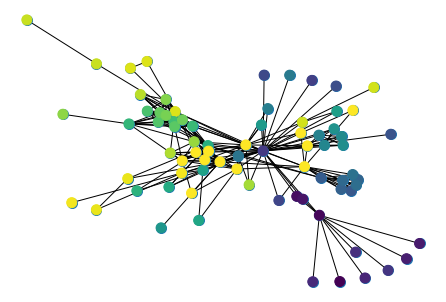

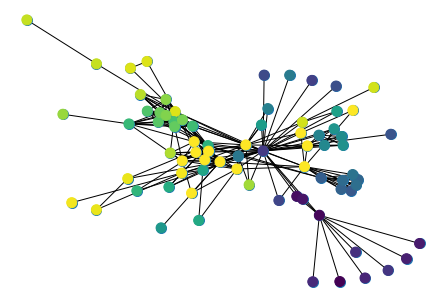

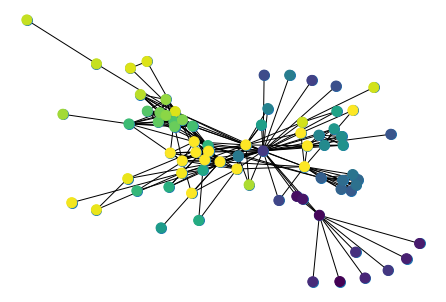

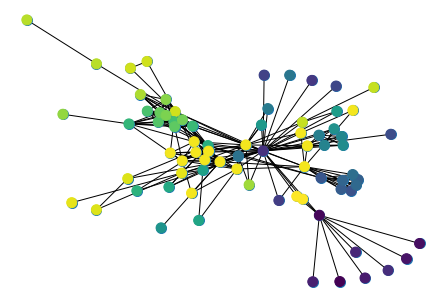

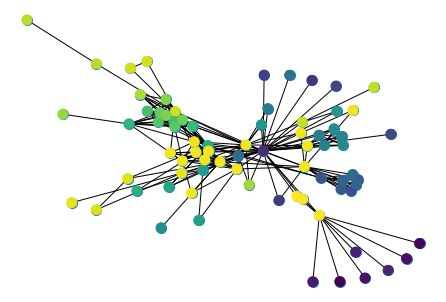

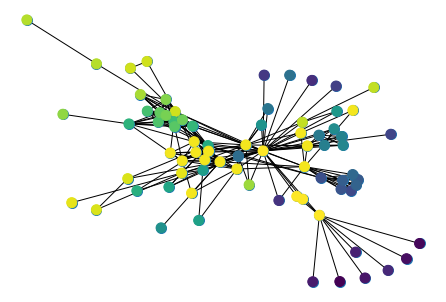

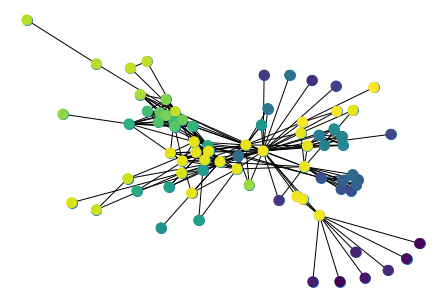

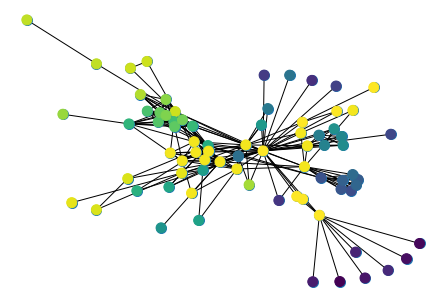

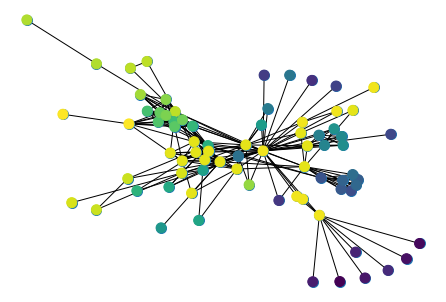

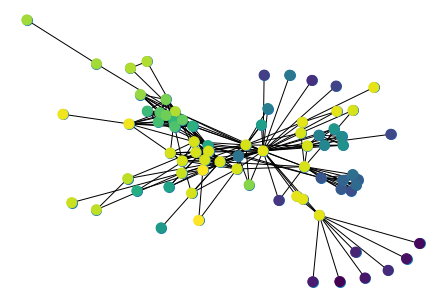

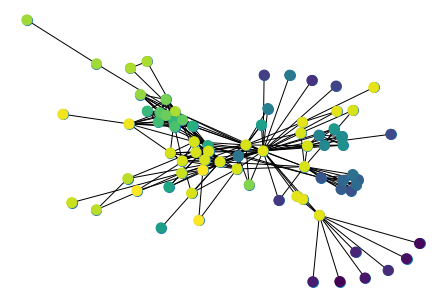

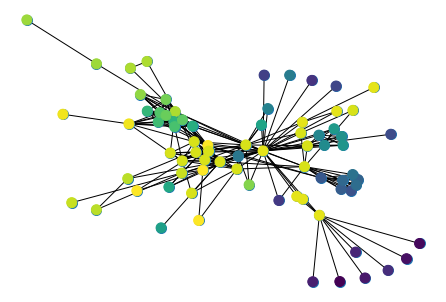

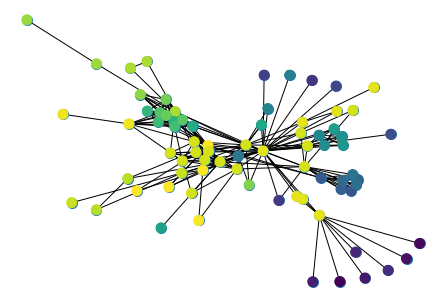

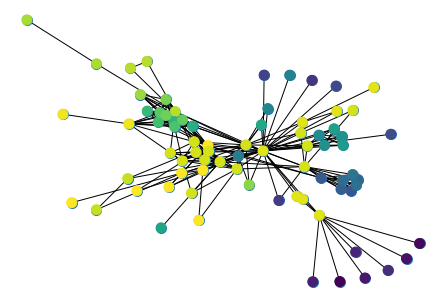

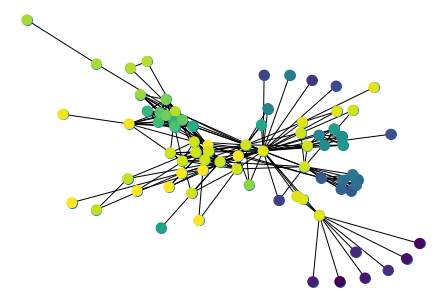

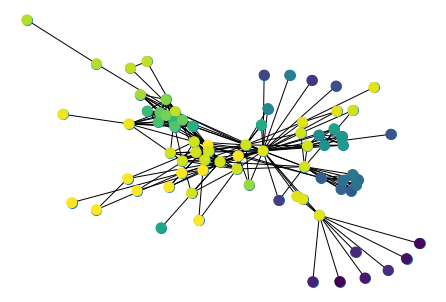

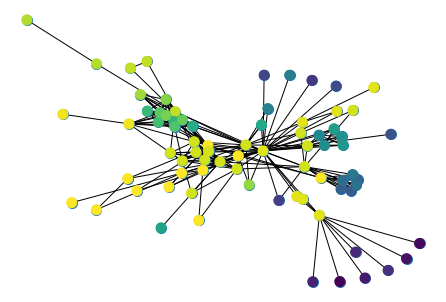

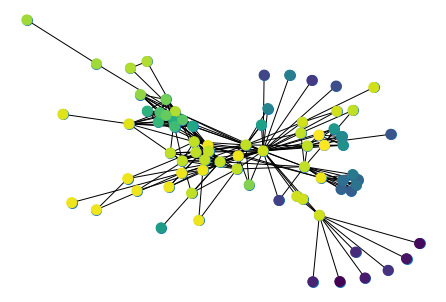

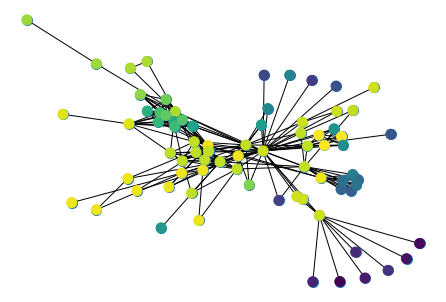

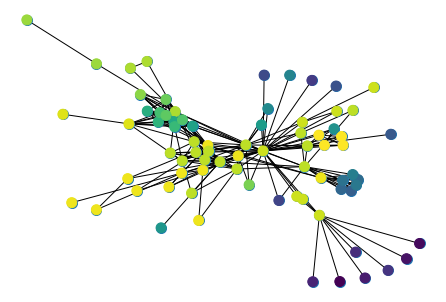

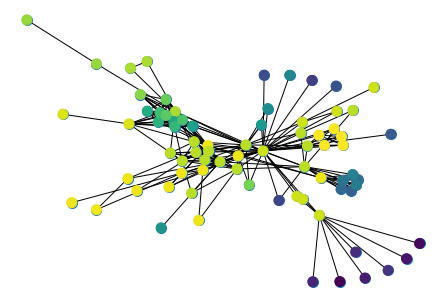

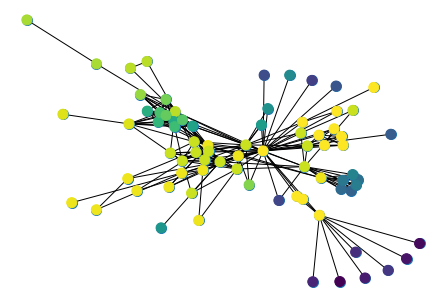

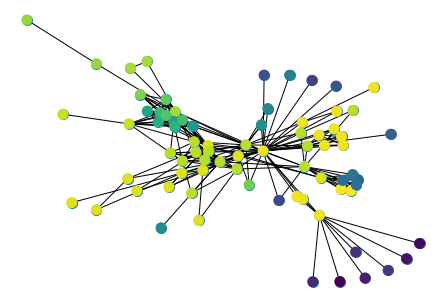

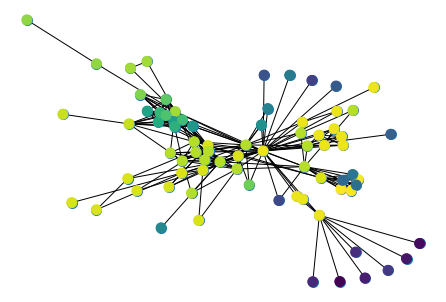

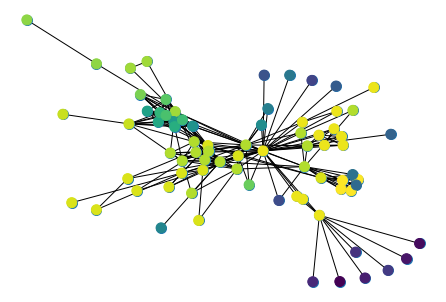

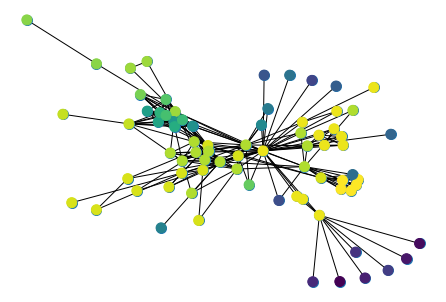

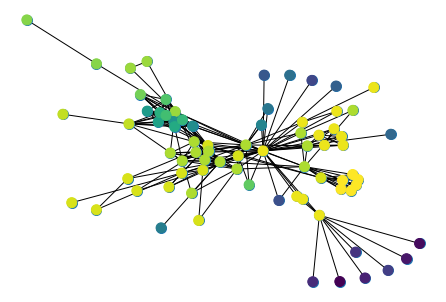

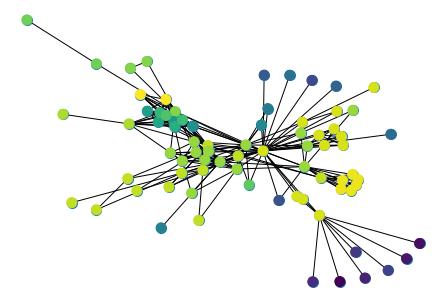

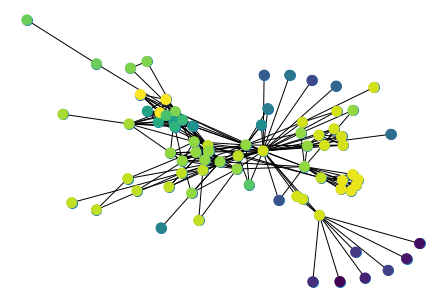

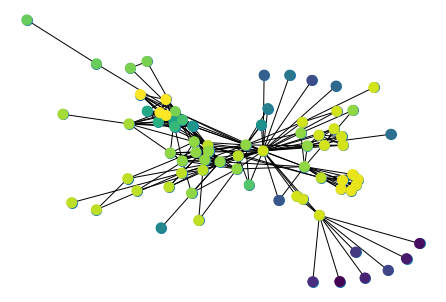

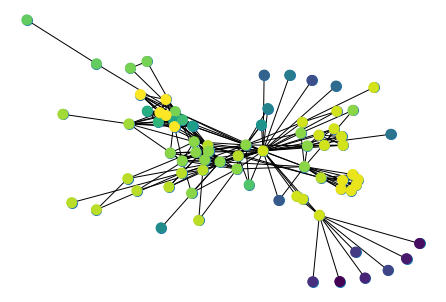

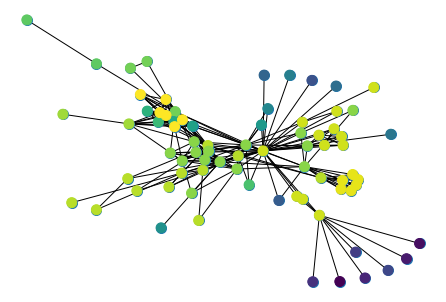

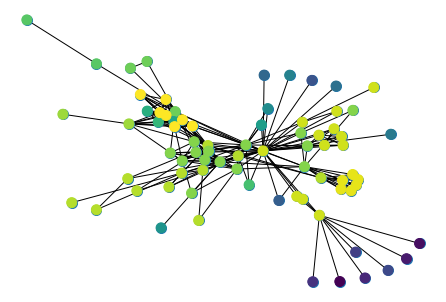

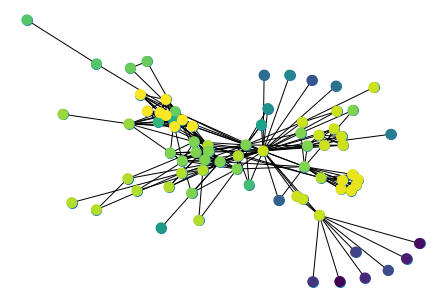

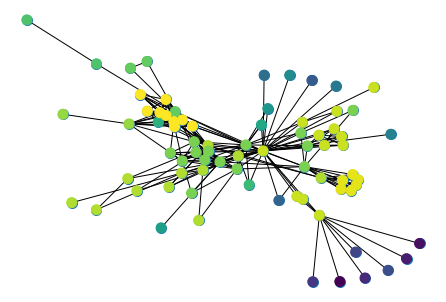

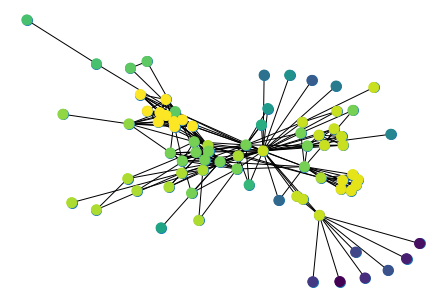

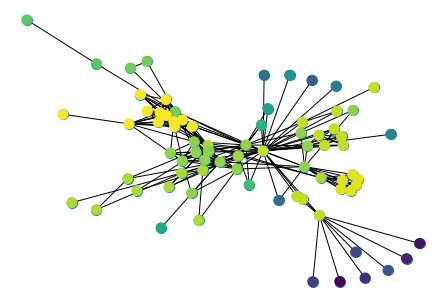

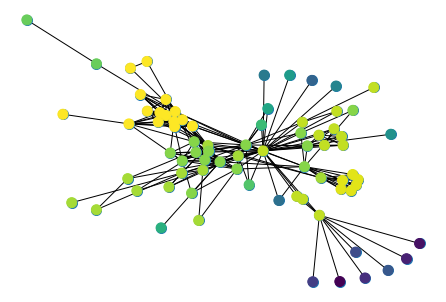

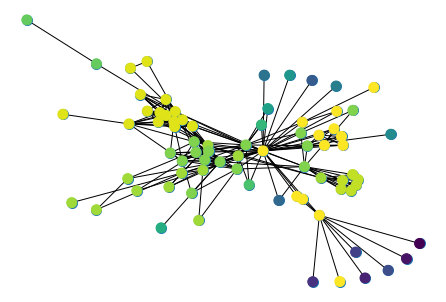

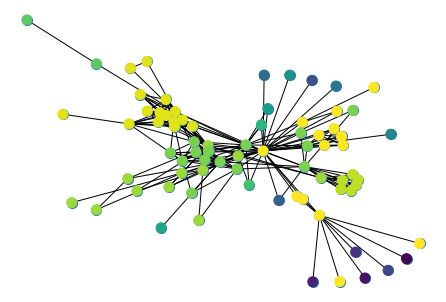

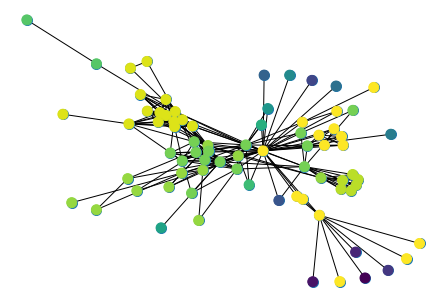

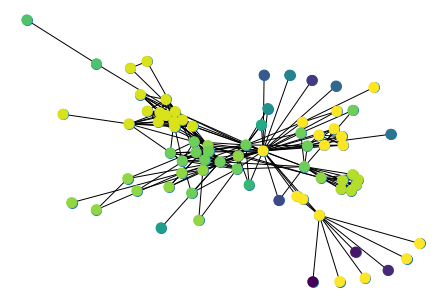

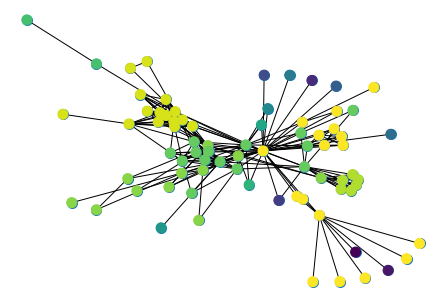

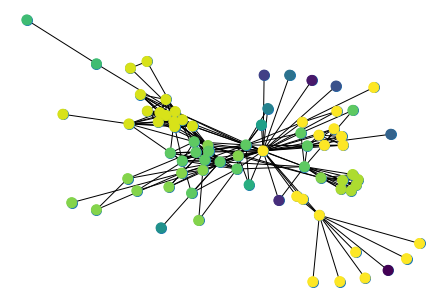

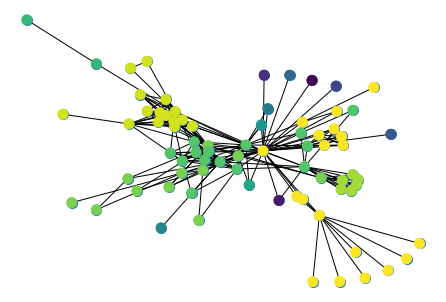

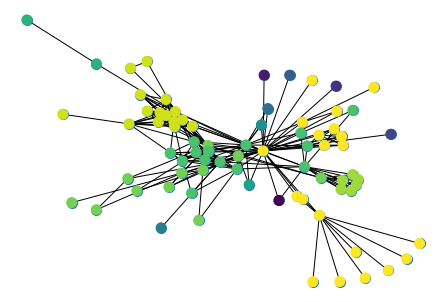

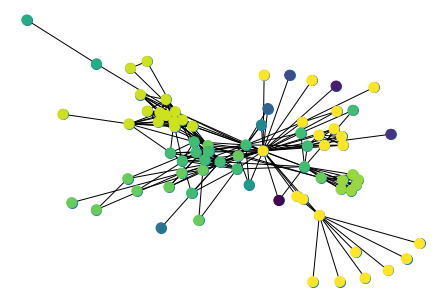

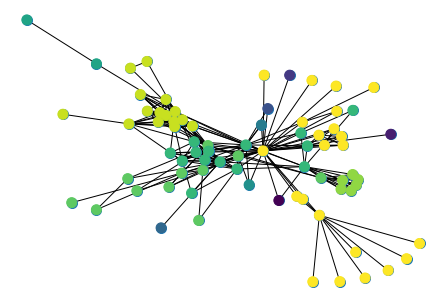

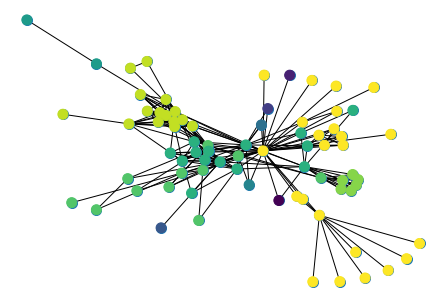

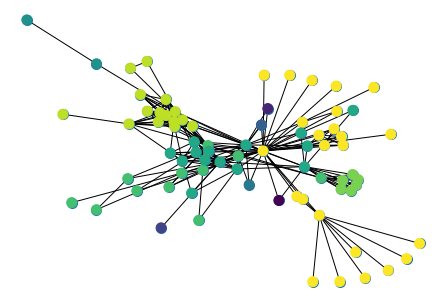

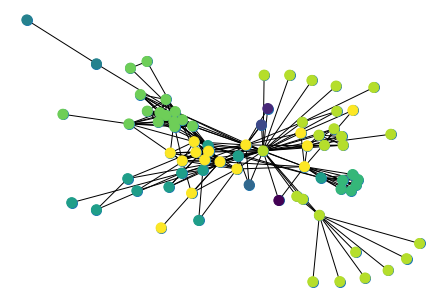

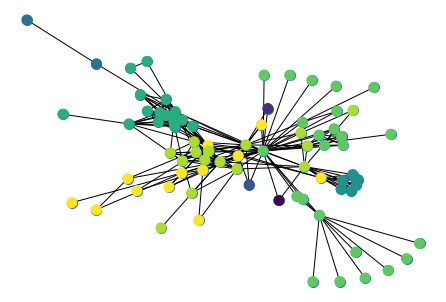

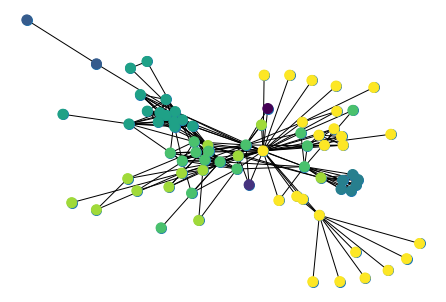

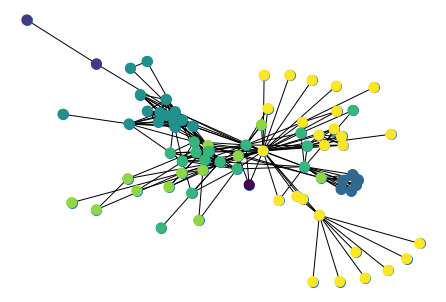

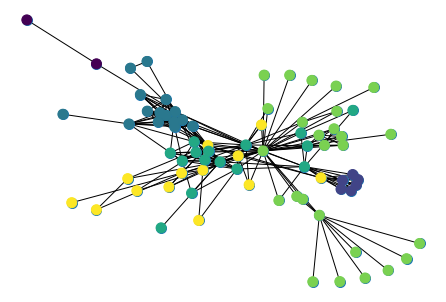

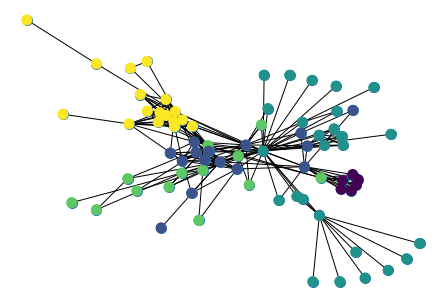

In [25]:
from itertools import combinations
import matplotlib.pyplot as plt
maxModularity=1000
prevModularity=modularity(G, communities)
while maxModularity>0:
    nx.draw(G, pos, node_size=100)
    colors=[]
    for i in G.nodes():
        for j in range(len(communities)):
            if i in communities[j]:
                colors.append(j)
    nodes=nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=colors, node_size=100)
    #plt.savefig("./images/les_mis"+str(iteration)+".png", dpi=300)
    plt.show()
    iteration+=1
    maxModularity=-1
    saveI=-1
    saveJ=-1
    for (i,j) in combinations(communities,2):
        communities2=[]
        for k in communities:
            if k!=i and k!=j:
                communities2.append(k)
        communities2.append(i+j)
        if modularity(G,communities2)-prevModularity>maxModularity:
            maxModularity=modularity(G,communities2)-prevModularity
            saveI=i
            saveJ=j
    if maxModularity>0:
        communities2=[]
        for k in communities:
            communities2.append(k)
        communities=[]
        for k in communities2:
            if k!=saveI and k!=saveJ:
                communities.append(k)
        communities.append(saveI+saveJ)
    prevModularity=modularity(G,communities)
    

Number of communities: 5
Communities: [['Zephine', 'Dahlia', 'Favourite', 'Blacheville', 'Listolier', 'Fameuil'], ['Boulatruelle', 'Brujon', 'Montparnasse', 'Eponine', 'Claquesous', 'Babet', 'Gueulemer', 'Anzelma', 'Thenardier', 'MmeThenardier', 'Bamatabois', 'Javert', 'Fantine', 'Perpetue', 'Simplice'], ['Woman1', 'Marguerite', 'Scaufflaire', 'Gervais', 'Isabeau', 'MmeDeR', 'Labarre', 'OldMan', 'Count', 'Cravatte', 'Champtercier', 'Geborand', 'CountessDeLo', 'Napoleon', 'Valjean', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'MotherInnocent', 'Fauchelevent', 'Gribier', 'Cochepaille', 'Chenildieu', 'Brevet', 'Judge', 'Champmathieu'], ['Toussaint', 'Woman2', 'Tholomyes', 'Pontmercy', 'MmePontmercy', 'Cosette', 'MlleGillenormand', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Gillenormand', 'Magnon'], ['MmeBurgon', 'Jondrette', 'Gavroche', 'Child1', 'Child2', 'Mabeuf', 'MotherPlutarch', 'Feuilly', 'Combeferre', 'Prouvaire', 'Enjolras', 'Bossuet', 'Courfeyrac', 'Joly', 'Bahorel',

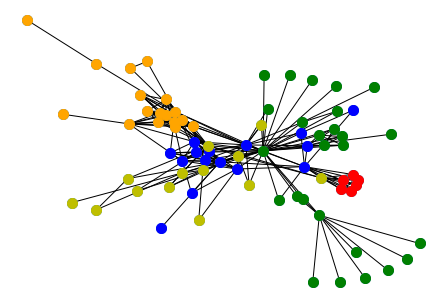

In [26]:
print("Number of communities:", len(communities))
print("Communities:", communities)
print("Modularity:", modularity(G,communities))
colors=['r', 'b', 'g', 'y', 'orange']

nx.draw(G, pos, node_size=100)
comm=0
for c in communities:
    nodes=nx.draw_networkx_nodes(G, pos, nodelist=c, node_color=colors[comm], node_size=100)
    comm+=1
#plt.savefig("./images/les_mis_final.png", dpi=300)

In [27]:
import networkx.algorithms.community as nx_comm
print(nx_comm.modularity(G, communities))
print(modularity(G,communities))

0.4729424449732302
0.5005967511935024
